In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df1 = pd.read_csv('daily-total-female-births-in-cal.csv')
df2 = pd.read_csv('mean-monthly-air-temperature-deg.csv')
df3 = pd.read_csv('monthly-boston-armed-robberies-j.csv')
df4 = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
df5 = pd.read_csv('weekly-closings-of-the-dowjones-.csv')

In [3]:
def date_format(*dfs):
    for df in dfs:
        for col in df.columns:
            if 'Date' in col:
                df[col] = pd.to_datetime(df[col])
                df.set_index('Date', inplace=True)
            elif 'Month' in col:
                df[col] = pd.to_datetime(df[col], format='%Y-%m')
                df.set_index('Month', inplace=True)
            elif 'Week' in col:
                df[col] = df[col].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-W%W-%w"))
                df.set_index('Week', inplace=True)
            else:
                pass
        df.info()

        
df_date = date_format(df1, df2, df3, df4, df5)
df_date


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Deg     240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0

In [4]:
def replace_columns(*dfs):
    for df in dfs:
        df.rename(columns={'Close': 'Value', 'Deg': 'Value', 'Count': 'Value'}, inplace=True)
    return dfs
dfs_new = replace_columns(df1, df2, df3, df4, df5)


            Value
Date             
1959-01-01     35
1959-01-02     32
1959-01-03     30
1959-01-04     31
1959-01-05     44
...           ...
1959-12-27     37
1959-12-28     52
1959-12-29     48
1959-12-30     55
1959-12-31     50

[365 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Единичных корней нет, ряд стационарный


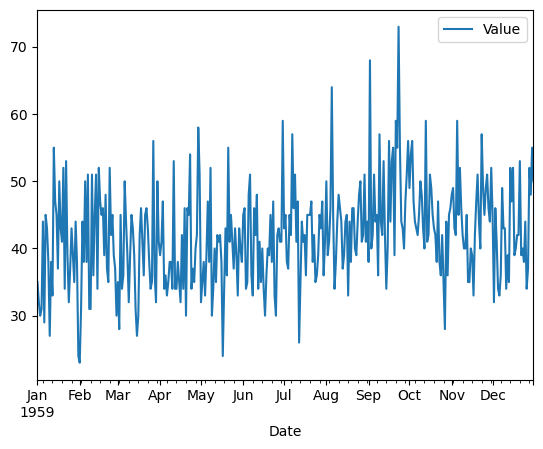

----------
            Value
Month            
1920-01-01   40.6
1920-02-01   40.8
1920-03-01   44.4
1920-04-01   46.7
1920-05-01   54.1
...           ...
1939-08-01   61.8
1939-09-01   58.2
1939-10-01   46.7
1939-11-01   46.6
1939-12-01   37.8

[240 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
Единичных корней нет, ряд стационарный


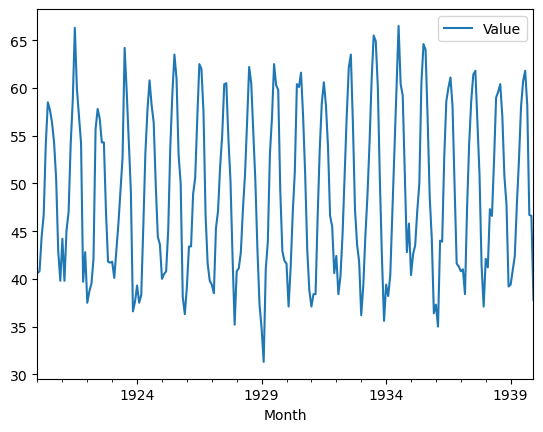

----------
            Value
Month            
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
...           ...
1975-06-01    316
1975-07-01    398
1975-08-01    394
1975-09-01    431
1975-10-01    431

[118 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Единичные корни есть, ряд нестационарный


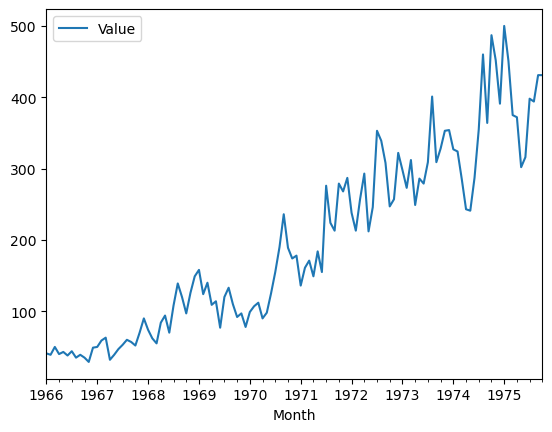

----------
            Value
Month            
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36
...           ...
1971-01-01    628
1971-02-01    308
1971-03-01    324
1971-04-01    248
1971-05-01    272

[77 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Единичные корни есть, ряд нестационарный


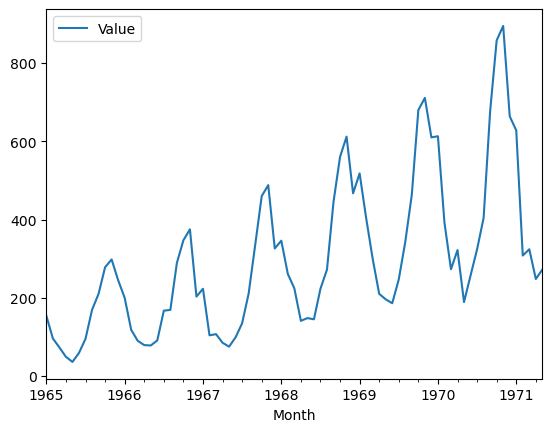

----------
             Value
Week              
1971-07-05  890.19
1971-07-12  901.80
1971-07-19  888.51
1971-07-26  887.78
1971-08-02  858.43
...            ...
1974-07-15  791.77
1974-07-22  787.23
1974-07-29  787.94
1974-08-05  784.57
1974-08-12  752.58

[162 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
Единичные корни есть, ряд нестационарный


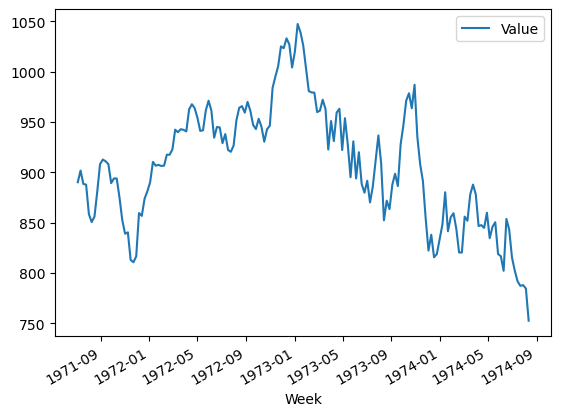

----------


In [5]:
def test_stationarity(*dfs):
    for df in dfs:
        print(df)
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(df, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for [key, value] in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        if dfoutput['Test Statistic'] > dfoutput['Critical Value (5%)']:
            print("Единичные корни есть, ряд нестационарный")
        else:
            print("Единичных корней нет, ряд стационарный")
        df.plot()
        plt.show()
        print('----------')
    
df_fuller = test_stationarity(df1, df2, df3, df4, df5)
df_fuller


Month
1966-02-01    -2.0
1966-03-01    11.0
1966-04-01   -10.0
1966-05-01     3.0
1966-06-01    -5.0
              ... 
1975-06-01    14.0
1975-07-01    82.0
1975-08-01    -4.0
1975-09-01    37.0
1975-10-01     0.0
Name: Value, Length: 117, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Единичных корней нет, ряд стационарный


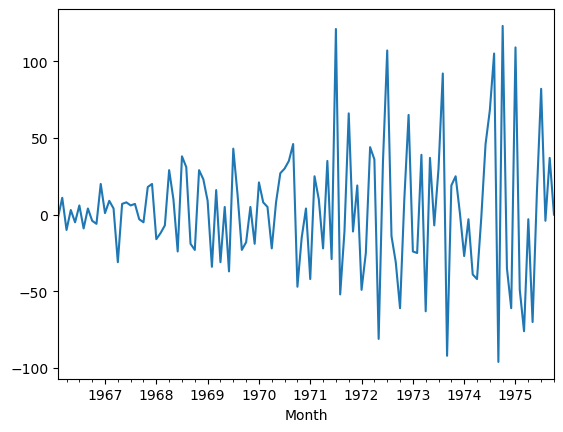

----------


In [6]:
# для работы возьмем df3, приведем его к стационарности
def diff(*dfs):
    result = []
    for df in dfs:
        df_copy = df.copy()  # создаем копию датафрейма
        df_copy['Value'] = df_copy['Value'].diff()
        df_copy = df_copy['Value'].dropna()
                #df_copy[col].plot()
                #plt.show()
        result.append(df_copy)

    return result

df_diff = diff(df3)

for df in df_diff:
    test_stationarity(df)

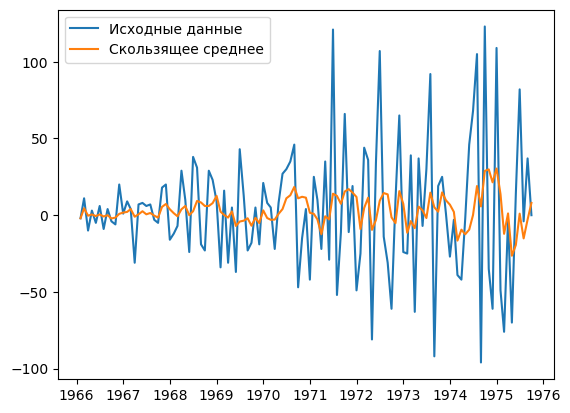

MAE: 30.2117
MSE: 1584.8514
RMSE: 39.8102
R2: 0.1130


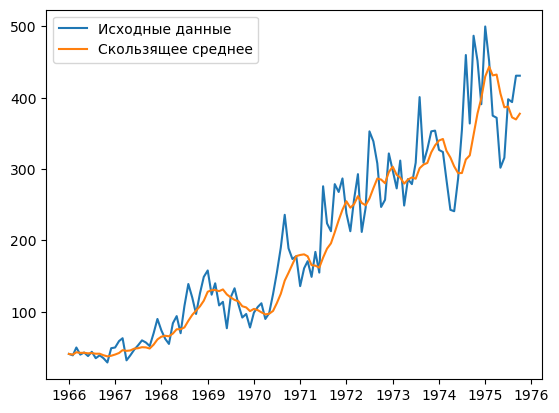

MAE: 28.7233
MSE: 1674.5233
RMSE: 40.9209
R2: 0.8933
Month
1966-02-01    -2.000000
1966-03-01     4.500000
1966-04-01    -0.333333
1966-05-01     0.500000
1966-06-01    -0.600000
                ...    
1975-06-01   -19.428571
1975-07-01     1.000000
1975-08-01   -15.142857
1975-09-01    -2.857143
1975-10-01     8.000000
Name: Value, Length: 117, dtype: float64
                 Value
Month                 
1966-01-01   41.000000
1966-02-01   40.000000
1966-03-01   43.333333
1966-04-01   42.500000
1966-05-01   42.600000
...                ...
1975-06-01  386.714286
1975-07-01  387.714286
1975-08-01  372.571429
1975-09-01  369.714286
1975-10-01  377.714286

[118 rows x 1 columns]


In [31]:
#Скользящее среднее
def rolling_mean(*dfs, window=7):

    rolling_means = []
    
    for df in dfs:
        df_copy = df.copy()
        # Вычисляем скользящее среднее
        rolling_mean = df_copy.rolling(window=window, min_periods=1).mean()

        # Отрисовываем график
        plt.plot(df_copy, label='Исходные данные')
        plt.plot(rolling_mean, label='Скользящее среднее')
        plt.legend()
        plt.show()

        # Вычисляем метрики качества
        mae = mean_absolute_error(df_copy[window:], rolling_mean[window:])
        mse = mean_squared_error(df_copy[window:], rolling_mean[window:])
        rmse = np.sqrt(mse)
        r2 = r2_score(df_copy[window:], rolling_mean[window:])

        # Выводим метрики качества
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")
        
        rolling_means.append(rolling_mean)
        
    return rolling_means

rolling_means = rolling_mean(df_diff[0], df3)
for roll in rolling_means:
    print(roll)

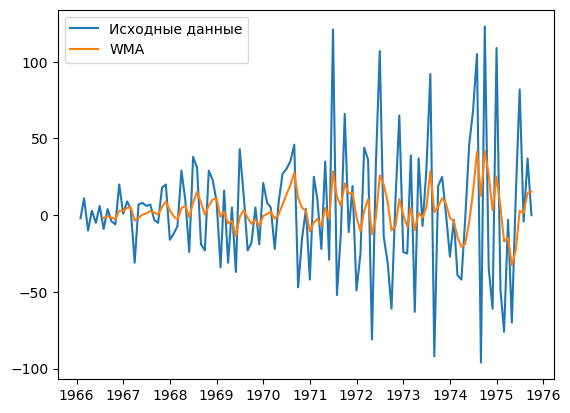

MAE: 27.5179
MSE: 1311.4199
RMSE: 36.2135
R2: 0.2660


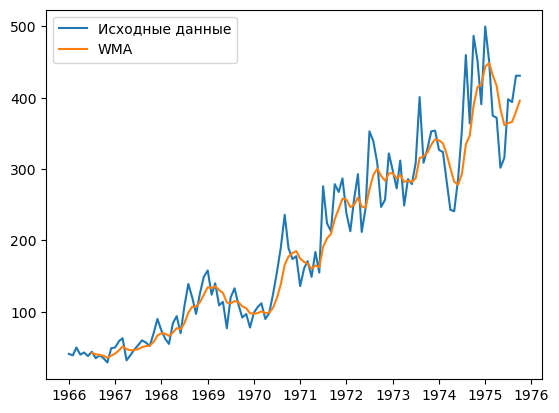

MAE: 23.4122
MSE: 1081.9055
RMSE: 32.8923
R2: 0.9310
Month
1966-08-01    -1.785714
1966-09-01    -0.571429
1966-10-01    -1.571429
1966-11-01    -2.535714
1966-12-01     2.857143
                ...    
1975-06-01   -22.535714
1975-07-01     2.821429
1975-08-01     1.571429
1975-09-01    14.607143
1975-10-01    15.321429
Name: Value, Length: 111, dtype: float64
                 Value
Month                 
1966-07-01   42.142857
1966-08-01   40.357143
1966-09-01   39.785714
1966-10-01   38.214286
1966-11-01   35.678571
...                ...
1975-06-01  361.714286
1975-07-01  364.535714
1975-08-01  366.107143
1975-09-01  380.714286
1975-10-01  396.035714

[112 rows x 1 columns]


In [25]:
#Взвешенное скользящее среднее
def wma(*dfs, window=7):
    w = np.arange(1, window+1)
    w = w / w.sum()  # Вычисляем веса

    rolling_means = []

    for df in dfs:
        df_copy = df.copy()

        # Вычисляем взвешенное скользящее среднее
        rolling_mean = df_copy.rolling(window=window, min_periods=window).apply(lambda x: (x * w).sum())

        # Отрисовываем график
        plt.plot(df_copy, label='Исходные данные')
        plt.plot(rolling_mean, label='WMA')
        plt.legend()
        plt.show()

        # Вычисляем метрики качества
        mae = mean_absolute_error(df_copy[window:], rolling_mean[window:])
        mse = mean_squared_error(df_copy[window:], rolling_mean[window:])
        rmse = np.sqrt(mse)
        r2 = r2_score(df_copy[window:], rolling_mean[window:])

        # Выводим метрики качества
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")

        rolling_means.append(rolling_mean[window-1:])

    return rolling_means

wma_values = wma(df_diff[0], df3)
for wma in wma_values:
    print(wma)

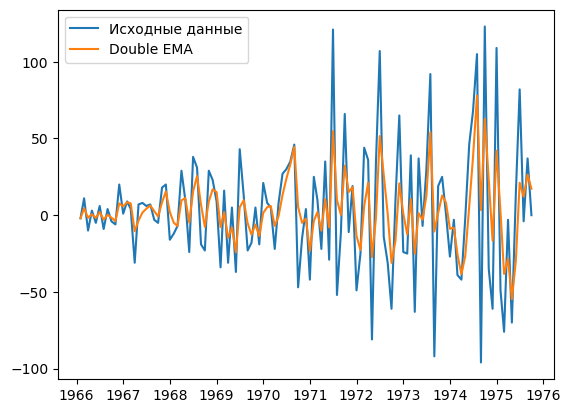

MAE: 20.6903
MSE: 797.2222
RMSE: 28.2351
R2: 0.5306


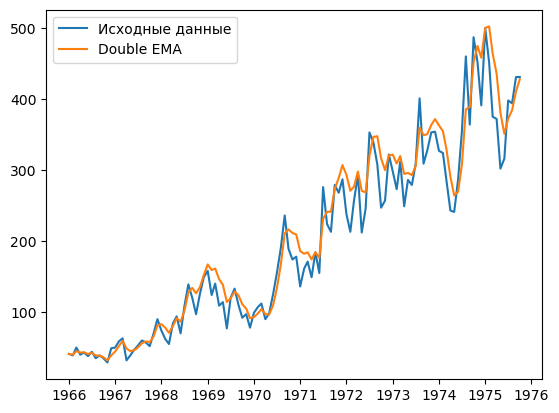

MAE: 21.1304
MSE: 821.5926
RMSE: 28.6634
R2: 0.9492
                 Value
Month                 
1966-07-01   42.142857
1966-08-01   40.357143
1966-09-01   39.785714
1966-10-01   38.214286
1966-11-01   35.678571
...                ...
1975-06-01  361.714286
1975-07-01  364.535714
1975-08-01  366.107143
1975-09-01  380.714286
1975-10-01  396.035714

[112 rows x 1 columns]
                 Value
Month                 
1966-07-01   42.142857
1966-08-01   40.357143
1966-09-01   39.785714
1966-10-01   38.214286
1966-11-01   35.678571
...                ...
1975-06-01  361.714286
1975-07-01  364.535714
1975-08-01  366.107143
1975-09-01  380.714286
1975-10-01  396.035714

[112 rows x 1 columns]


In [28]:
#Двойное Экспоненциальное сглаживание
def double_ema_values(*dfs, alpha=0.3, beta=0.1):

    ema1_values = []
    ema2_values = []
    double_ema_values = []

    for df in dfs:
        df_copy = df.copy()

        ema1 = df_copy.ewm(alpha=alpha, adjust=False).mean()
        ema2 = df_copy.ewm(alpha=beta, adjust=False).mean()
        double_ema = 2 * ema1 - ema2

        plt.plot(df_copy, label='Исходные данные')
        plt.plot(double_ema, label='Double EMA')
        plt.legend()
        plt.show()

        mae = mean_absolute_error(df_copy[1:], double_ema[1:])
        mse = mean_squared_error(df_copy[1:], double_ema[1:])
        rmse = np.sqrt(mse)
        r2 = r2_score(df_copy[1:], double_ema[1:])

        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")

        ema1_values.append(ema1)
        ema2_values.append(ema2)
        double_ema_values.append(double_ema)

    return double_ema_values

des_values =  double_ema_values(df_diff[0], df3)
for des in des_values:
    print(wma)

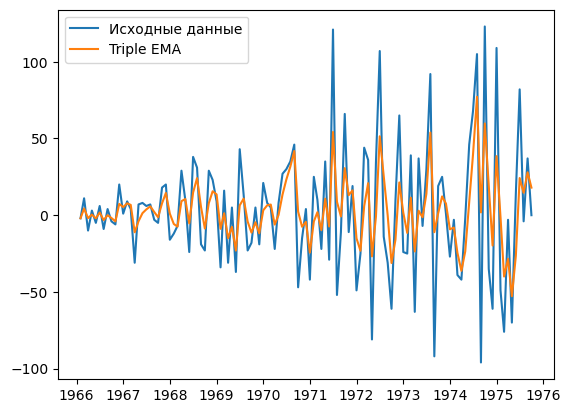

MAE: 20.6457
MSE: 782.9387
RMSE: 27.9810
R2: 0.5428


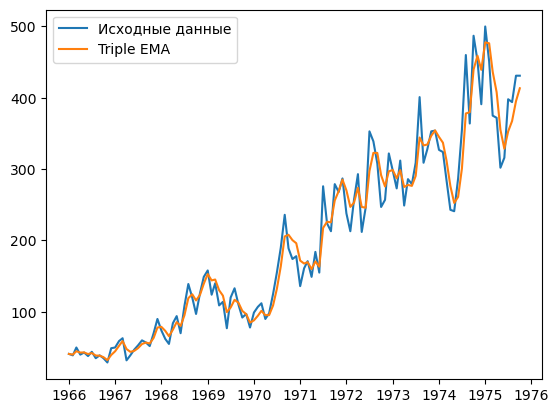

MAE: 16.6305
MSE: 528.6454
RMSE: 22.9923
R2: 0.9672
                 Value
Month                 
1966-07-01   42.142857
1966-08-01   40.357143
1966-09-01   39.785714
1966-10-01   38.214286
1966-11-01   35.678571
...                ...
1975-06-01  361.714286
1975-07-01  364.535714
1975-08-01  366.107143
1975-09-01  380.714286
1975-10-01  396.035714

[112 rows x 1 columns]
                 Value
Month                 
1966-07-01   42.142857
1966-08-01   40.357143
1966-09-01   39.785714
1966-10-01   38.214286
1966-11-01   35.678571
...                ...
1975-06-01  361.714286
1975-07-01  364.535714
1975-08-01  366.107143
1975-09-01  380.714286
1975-10-01  396.035714

[112 rows x 1 columns]


In [30]:
#Тройное экспоненциальное сглаживание
def triple_ema(*dfs, alpha=0.2, beta=0.2, gamma=0.2):
    ema1_values = []
    ema2_values = []
    ema3_values = []
    triple_ema_values = []

    for df in dfs:
        df_copy = df.copy()

        ema1 = df_copy.ewm(alpha=alpha, adjust=False).mean()
        ema2 = ema1.ewm(alpha=beta, adjust=False).mean()
        ema3 = ema2.ewm(alpha=gamma, adjust=False).mean()
        triple_ema = 3 * ema1 - 3 * ema2 + ema3


        plt.plot(df_copy, label='Исходные данные')
        plt.plot(triple_ema, label='Triple EMA')
        plt.legend()
        plt.show()

        mae = mean_absolute_error(df_copy[2:], triple_ema[2:])
        mse = mean_squared_error(df_copy[2:], triple_ema[2:])
        rmse = np.sqrt(mse)
        r2 = r2_score(df_copy[2:], triple_ema[2:])

        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")

        ema1_values.append(ema1)
        ema2_values.append(ema2)
        ema3_values.append(ema3)
        triple_ema_values.append(triple_ema)

    return triple_ema_values
tes_values =  triple_ema(df_diff[0], df3)
for tes in tes_values:
    print(wma)

# Выводы

Исходя из метрик, которые были получены при применении 4 различных моделей (MA, WMA, DEMA, TEMA) на стационарном и нестационарном временных рядах, можно сделать следующие выводы:

Для стационарного ряда:

- Модель с наилучшими показателями MAE, MSE и RMSE - TEMA, с результатами 20.6457, 782.9387 и 27.9810 соответственно.
- Модель с наилучшим показателем R2 - DEMA, с результатом 0.5306.

Для нестационарного ряда:

- Модель с наилучшими показателями MAE, MSE и RMSE - TEMA, с результатами 16.6305, 528.6454 и 22.9923 соответственно.
- Модель с наилучшим показателем R2 - TEMA, с результатом 0.9672.

Таким образом, можно сделать вывод, что модель TEMA дает лучшие результаты для обоих типов временных рядов, поскольку она имеет наилучшие значения метрик MAE, MSE и RMSE, а также достаточно высокий коэффициент детерминации R2.